In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ensemble_project as ens

from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd

In [3]:
data = arff.loadarff('C:/Users/Supervisor/Desktop/Kollektif Öğrenme/Proje/credit-a.arff')
df = pd.DataFrame(data[0])

df.head()

,A1,A2,A3,A4=u,A4=y,A4=l,A5=g,A5=p,A5=gg,A6=c,...,A9,A10,A11,A12,A13=g,A13=p,A13=s,A14,A15,a43+1
0,0.0,0.256842,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.014925,1.0,1.0,0.0,0.0,0.1010,0.00000,b'1'
1,1.0,0.675489,0.159286,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.089552,1.0,1.0,0.0,0.0,0.0215,0.00560,b'1'
2,1.0,0.161654,0.017857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.1400,0.00824,b'1'
3,0.0,0.211729,0.055000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.074627,0.0,1.0,0.0,0.0,0.0500,0.00003,b'1'
4,0.0,0.096541,0.200893,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.0600,0.00000,b'1'


In [4]:
X = df.drop(['a43+1'],axis=1)
y = df['a43+1']

In [5]:
y.groupby(y).count()

a43+1
b'1'    307
b'2'    383
Name: a43+1, dtype: int64

In [6]:
y = y.apply(lambda x : 1 if x==b'1' else 2)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
bagging_100vs10x10, eoe_bagging_100vs10x10, result_bagging_100vs10x10, ttest_bagging_vs_ens = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x10)
print(ttest_bagging_vs_ens)

   bagging_acc  ens_acc
0     0.847826  0.84058
        t         p
0 -1.3484  0.235387


In [9]:
ada_100vs10x10, eoe_ada_100vs10x10, result_ada_100vs10x10, ttest_ada_vs_ens = ens.adaBoostClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x10)
print(ttest_ada_vs_ens)

   ada_acc   ens_acc
0  0.76087  0.811594
          t         p
0 -0.404153  0.702807


In [10]:
rs_100vs10x10, eoe_rs_100vs10x10, result_rs_100vs10x10, ttest_rs_vs_ens = ens.randomSubspaceClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x10)
print(ttest_rs_vs_ens)

   rnd_subspace_acc   ens_acc
0          0.768116  0.847826
         t         p
0  1.59681  0.171197


In [11]:
rf_100vs10x10, eoe_rf_100vs10x10, result_rf_100vs10x10, ttest_rf_vs_ens = ens.randomForestClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x10)
print(ttest_rf_vs_ens)

     rf_acc  ens_acc
0  0.847826  0.84058
          t        p
0  0.476731  0.65366


In [12]:
extra_100vs10x10, eoe_extra_100vs10x10, result_extra_100vs10x10, ttest_extra_vs_ens = ens.extraTreesClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x10)
print(ttest_extra_vs_ens)

   extra_acc   ens_acc
0   0.818841  0.811594
          t        p
0 -1.270571  0.25979


In [13]:
bagging_100vs10x100, eoe_bagging_100vs10x100, result_bagging_100vs10x100, ttest_bagging_vs_ens_100 = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x100)
print(ttest_bagging_vs_ens_100)

   bagging_acc   ens_acc
0      0.84058  0.833333
          t         p
0 -0.877058  0.420591


In [14]:
ada_100vs10x100, eoe_ada_100vs10x100, result_ada_100vs10x100, ttest_ada_vs_ens_100 = ens.adaBoostClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x100)
print(ttest_ada_vs_ens_100)

   ada_acc  ens_acc
0  0.76087  0.76087
    t   p
0 NaN NaN


In [15]:
rs_100vs10x100, eoe_rs_100vs10x100, result_rs_100vs10x100, ttest_rs_vs_ens_100 = ens.randomSubspaceClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x100)
print(ttest_rs_vs_ens_100)

   rnd_subspace_acc   ens_acc
0           0.76087  0.855072
          t         p
0  1.303117  0.249315


In [16]:
rf_100vs10x100, eoe_rf_100vs10x100, result_rf_100vs10x100, ttest_rf_vs_ens_100 = ens.randomForestClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x100)
print(ttest_rf_vs_ens_100)

     rf_acc   ens_acc
0  0.869565  0.862319
          t         p
0 -1.195229  0.285591


In [17]:
extra_100vs10x100, eoe_extra_100vs10x100, result_extra_100vs10x100, ttest_extra_vs_ens_100 = ens.extraTreesClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x100)
print(ttest_extra_vs_ens_100)

   extra_acc   ens_acc
0    0.84058  0.818841
          t         p
0 -2.564946  0.050343


In [18]:
all_df = ens.single_vote_stack(X_train, X_test, y_train, y_test)

In [19]:
all_df

,0,1
0,Bagging,0.829710
1,Adaboost,0.811594
2,RS,0.814493
3,RF,0.830435
4,ExtraRandomTree,0.828261
5,Voting,0.829710
6,Stack_Bagging,0.828986
7,Stack_Adaboost,0.827536
8,Stack_RS,0.825362
9,Stack_RF,0.835507


In [20]:
import matplotlib.pyplot as plt

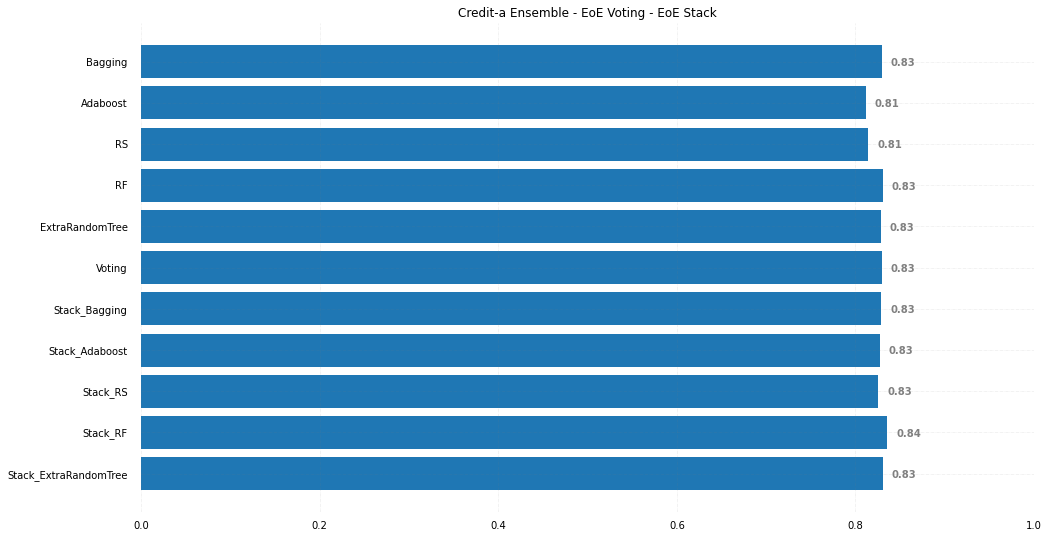

In [21]:
name = all_df[0]
acc = all_df[1]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.set_xlim(0,1)

# Horizontal Bar Plot
ax.barh(name, acc)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Credit-a Ensemble - EoE Voting - EoE Stack', loc ='center')
 

 
# Show Plot
plt.show()